# Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data prep

In [8]:
# transforming data into numpy array to apply basic linear algebra operations more easily
mnist = pd.read_csv('/Downloads/digit-recognizer/mnist_train.csv')
mnist =  np.array(mnist)
np.random.shuffle(mnist)
mnist = mnist

tot_images = len(mnist)

# split the dataset into training and testing sets 80%/20%
train_mnist, test_mnist = mnist[:int(tot_images*0.8)].T, mnist[int(tot_images*0.8):].T

# split  data into images and lables, normalize the images (0-1, computationally faster)
train_imgs, train_lables = train_mnist[1:] / 255, train_mnist[0]
test_imgs, test_lables =   test_mnist[1:] / 255, test_mnist[0]

n_features, n_images = train_imgs.shape
n_classes = m = 10

# Functions

In [9]:
# function to initialize W1, W2 and b1, b2
def initialize_parameters(n_classes, n_features):
    W1 = np.random.rand(n_classes, n_features) - 0.5
    b1 = np.zeros((n_classes, 1))
    W2 = np.random.rand(n_classes, n_classes) - 0.5
    b2 = np.zeros((n_classes, 1))
    return W1, b1, W2, b2

    
# foward probability function 
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    # calculate A1 using ReLU
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(W2, A1) + b2
    # calculate A2 using Softmax
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    return A1, A2


# one hot function to convert labels to one hot vectors
def one_hot(y, n_classes=10):
    one_hot = np.zeros((n_classes, y.shape[0]))
    for i in range(y.shape[0]):
        one_hot[y[i], i] = 1
    return one_hot


# define a backward propagation function
def backward(X, Y, A1, A2, W1, W2):
    dZ2 = A2 - one_hot(Y)
    dW2 = np.dot(dZ2, A1.T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]
    dA1 = np.dot(W2.T, dZ2)
    # calculate dZ1 using ReLU derivative
    dZ1 = dA1 * (A1 > 0)
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[1]
    return dW1, db1, dW2, db2


# update parameters function
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


# get prediction function
def get_prediction(X, W1, b1, W2, b2):
    _, A2 = forward(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

# get accuracy function
def get_accuracy(X, Y, W1, b1, W2, b2):
    pred = get_prediction(X, W1, b1, W2, b2)
    return np.mean(pred == Y)

# train function (gradient descent)
def train(X, Y, n_iterations=500, alpha=0.1):
    W1, b1, W2, b2 = initialize_parameters(n_classes, n_features)
    for i in range(n_iterations):
        A1, A2 = forward(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward(X, Y, A1, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(X, Y, W1, b1, W2, b2))
    return W1, b1, W2, b2

# Train

In [10]:
W1, b1, W2, b2 = train(train_imgs, train_lables, n_iterations=1500, alpha=0.2)

Iteration:  1490
Accuracy:  0.9133630952380952


# Test and display!

In [14]:
# obtain predictions on the test set
pred = get_prediction(test_imgs, W1, b1, W2, b2)
# calculate accuracy
acc = get_accuracy(test_imgs, test_lables, W1, b1, W2, b2)
print("Accuracy in test set: ", acc)
if acc < 0.8:
    print("Model generalizes poorly!")
elif 0.9 > acc >= 0.8:
    print("Model does generalize well!")
else:
    print("Model is very accurate!")

Accuracy in test set:  0.9088095238095238
Model is very accurate!


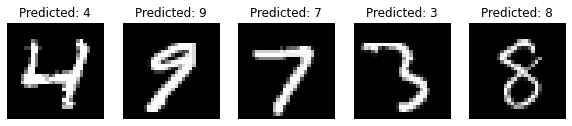

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(10, 4))

for i in range(5):
    r = np.random.randint(0, len(test_imgs))
    ax[i].imshow(test_imgs[:, r].reshape(28, 28), cmap='gray')
    ax[i].set_title("Predicted: {}".format(pred[r]))
    ax[i].axis('off')